In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import researchpy, numpy, pandas
import scipy.stats
from scipy import stats
import math
import statistics
import researchpy as rp
import scipy.stats as stats

In [101]:
#De data binnenhalen
train=pd.read_csv('../../../data/Airlinesatisfaction.csv')

In [102]:
#Random steekproef van 100
random_subset = train.sample(n=100)
print(random_subset.head(5))

       Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
3591         3591   85028  Female     Loyal Customer   23  Personal Travel   
54189       54189  123788  Female  disloyal Customer   34  Business travel   
61249       61249  104893    Male     Loyal Customer   40  Business travel   
32393       32393   17641  Female     Loyal Customer   40  Business travel   
19511       19511  112344  Female     Loyal Customer   53  Business travel   

          Class  Flight Distance  Inflight wifi service  \
3591        Eco             1590                      3   
54189  Business              541                      3   
61249  Business             1565                      3   
32393       Eco             1008                      3   
19511  Business              846                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
3591                                   4  ...                       2   
54189                         

In [103]:
# Drop unnecessary columns
random_subset = random_subset.drop('Unnamed: 0', axis=1)
random_subset = random_subset.drop('id', axis=1)

In [104]:
#Check de data even; zorg dat je geen missing values hebt (zit alleen bij Arrival Delay)
random_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 3591 to 42749
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             100 non-null    object 
 1   Customer Type                      100 non-null    object 
 2   Age                                100 non-null    int64  
 3   Type of Travel                     100 non-null    object 
 4   Class                              100 non-null    object 
 5   Flight Distance                    100 non-null    int64  
 6   Inflight wifi service              100 non-null    int64  
 7   Departure/Arrival time convenient  100 non-null    int64  
 8   Ease of Online booking             100 non-null    int64  
 9   Gate location                      100 non-null    int64  
 10  Food and drink                     100 non-null    int64  
 11  Online boarding                    100 non-null    in

In [105]:
#Vervang codering voor cijfers
random_subset['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [106]:
#Eens kijken wat we in de dataset hebben; de variabelen met gemiddelde en de standaardafwijking
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,100.0,39.38,15.109553,7.0,27.0,39.5,52.00,68.0
Flight Distance,100.0,1238.87,1071.611697,86.0,397.0,840.0,1721.75,3979.0
Inflight wifi service,100.0,2.83,1.206506,0.0,2.0,3.0,4.00,5.0
Departure/Arrival time convenient,100.0,3.00,1.497473,0.0,2.0,3.0,4.00,5.0
Ease of Online booking,100.0,2.74,1.291933,0.0,2.0,3.0,4.00,5.0
Gate location,100.0,2.94,1.277782,1.0,2.0,3.0,4.00,5.0
Food and drink,100.0,3.39,1.301863,1.0,2.0,4.0,4.00,5.0
Online boarding,100.0,3.42,1.207552,1.0,3.0,4.0,4.00,5.0
Seat comfort,100.0,3.62,1.229108,1.0,3.0,4.0,5.00,5.0
Inflight entertainment,100.0,3.60,1.302678,1.0,3.0,4.0,5.00,5.0


In [107]:
#We gaan het een en ander doen met satisfaction; verstandig om te coderen naar cijfers
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [108]:
random_subset['Age'].value_counts()

36    5
49    5
52    5
23    4
25    4
43    4
57    4
24    4
44    3
39    3
33    3
40    3
27    3
58    3
29    3
68    2
34    2
55    2
38    2
30    2
46    2
53    2
50    2
37    2
7     2
51    2
22    2
18    2
56    1
61    1
47    1
66    1
54    1
59    1
12    1
60    1
9     1
48    1
20    1
64    1
8     1
67    1
28    1
42    1
10    1
26    1
Name: Age, dtype: int64

In [109]:
random_subset['satisfaction'].value_counts()

0    59
1    41
Name: satisfaction, dtype: int64

In [110]:
#Mooiere output
rp.summary_cont(random_subset['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,100.0,39.38,15.1096,1.511,36.3819,42.3781


In [111]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]

In [112]:
rp.summary_cont(random_subset['Flight_Distance'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Flight_Distance,100.0,1238.87,1071.6117,107.1612,1026.239,1451.501


/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74764/931596904.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Flight Distance Distribution')

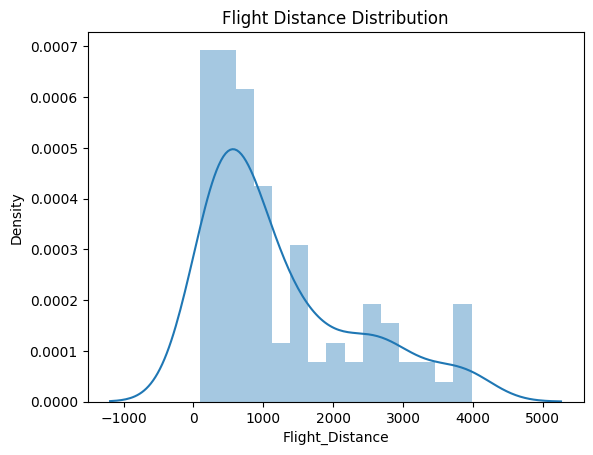

In [113]:
#Visuele checks van de verdelingen
x = random_subset['Flight_Distance']
sns.distplot(x, bins = 15)
plt.title('Flight Distance Distribution')


/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74764/3851658820.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, '/Age')

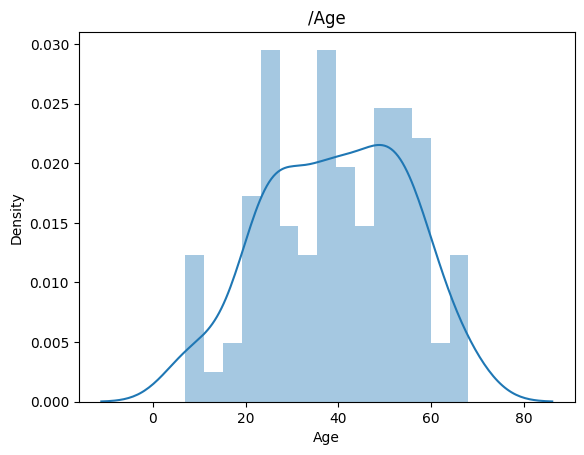

In [114]:
x = random_subset['Age']
sns.distplot(x, bins = 15)
plt.title('/Age')


/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74764/2432483861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Departure Delay in Minutes')

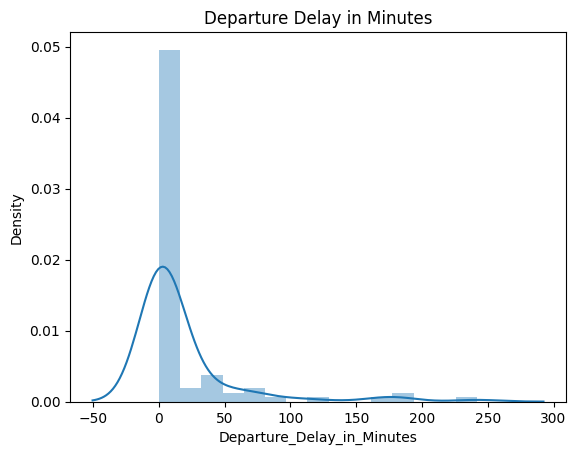

In [115]:
x = random_subset['Departure_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Departure Delay in Minutes')

/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74764/403260203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Arrival Delay in Minutes')

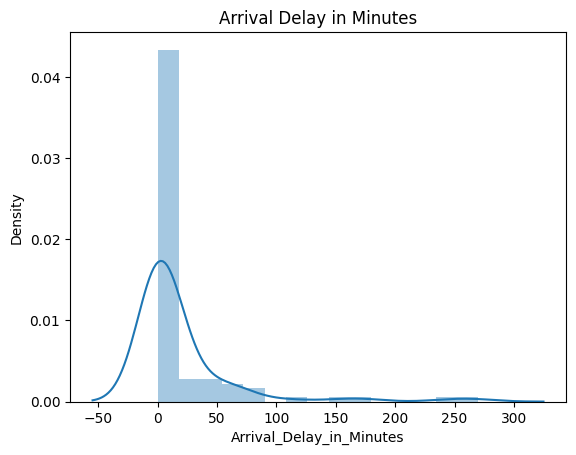

In [116]:
x = random_subset['Arrival_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Arrival Delay in Minutes')

In [117]:
#We willen een toets doen om te bepalen of de data normaal verdeeld is
#Dan moeten we de betrefffende variabele eerst sorteren van laag naar hoog
#Dat blijkt evenwel slechts bij sommige librairies met KS nodig te zijn
#Hierbij toch de code, voor het geval je een andere library gebruikt
#waarbij het wel nodig is
random_subset.sort_values(
    ['Age'],
    ascending=True,
    inplace=True)

In [118]:
#Vervolgens moeten we de data normaliseren (dus omzetten in z -scores)
#Ik maak daar een nieuwe dataset van (df_z)
from sklearn.preprocessing import StandardScaler
#En ik zet eerst alle scores om in cijfers
random_subset['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
random_subset['Customer_Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
random_subset['Type_of_Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
random_subset['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)


In [119]:
#Eindelijk is het zover
print(random_subset[0:5])
scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(random_subset), columns = random_subset.columns)
print(df_z[0:5])

       Gender  Customer_Type  Age  Type_of_Travel  Class  Flight_Distance  \
9706        0              1    7               0      1              808   
52984       0              1    7               0      2              372   
92747       1              1    8               0      2              285   
38567       1              1    9               0      1             2133   
52413       0              1   10               0      1              867   

       Inflight_wifi_service  Departure/Arrival_time_convenient  \
9706                       4                                  2   
52984                      3                                  0   
92747                      3                                  4   
38567                      2                                  1   
52413                      3                                  5   

       Ease_of_Online_booking  Gate_location  ...  Inflight_entertainment  \
9706                        4              4  ...        

In [120]:
#Dan een test. Er zijn vele mogelijkheden; we kiezen voor de Kolmogorov Smirnov Test
#Deze voer ik dus uit op de gestandaardiseerde dataset
stats.kstest(df_z['Age'], stats.norm.cdf)


KstestResult(statistic=0.08887820125756185, pvalue=0.3857971002785665, statistic_location=0.6398907968931816, statistic_sign=-1)

In [121]:
stats.kstest(df_z['Flight_Distance'], stats.norm.cdf)


KstestResult(statistic=0.19533180640834935, pvalue=0.0008102932403875052, statistic_location=-0.26717244987494365, statistic_sign=1)

In [122]:
stats.kstest(df_z['Departure_Delay_in_Minutes'], stats.norm.cdf)


KstestResult(statistic=0.3377867071001169, pvalue=1.1088494040985227e-10, statistic_location=-0.09485929846848518, statistic_sign=1)

In [123]:
stats.kstest(df_z['Arrival_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.3381362019615225, pvalue=1.0547406064579843e-10, statistic_location=-0.41755513656495236, statistic_sign=-1)

In [124]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,100.0,0.47,0.501614,0.0,0.0,0.0,1.00,1.0
Customer_Type,100.0,0.82,0.386123,0.0,1.0,1.0,1.00,1.0
Age,100.0,39.38,15.109553,7.0,27.0,39.5,52.00,68.0
Type_of_Travel,100.0,0.69,0.464823,0.0,0.0,1.0,1.00,1.0
Class,100.0,2.01,0.969171,1.0,1.0,2.0,3.00,3.0
Flight_Distance,100.0,1238.87,1071.611697,86.0,397.0,840.0,1721.75,3979.0
Inflight_wifi_service,100.0,2.83,1.206506,0.0,2.0,3.0,4.00,5.0
Departure/Arrival_time_convenient,100.0,3.00,1.497473,0.0,2.0,3.0,4.00,5.0
Ease_of_Online_booking,100.0,2.74,1.291933,0.0,2.0,3.0,4.00,5.0
Gate_location,100.0,2.94,1.277782,1.0,2.0,3.0,4.00,5.0


<AxesSubplot: xlabel='Age'>

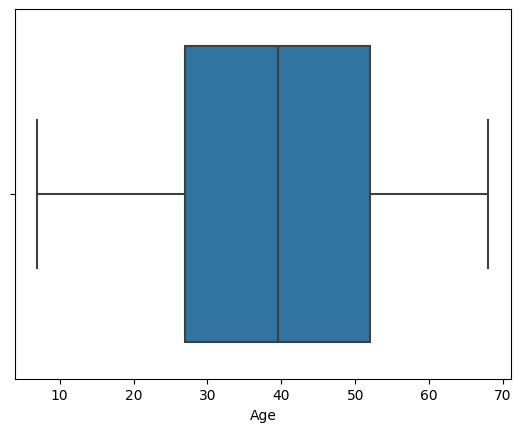

In [125]:
import seaborn as sns
sns.boxplot(x=random_subset['Age'])

<AxesSubplot: xlabel='Flight_Distance'>

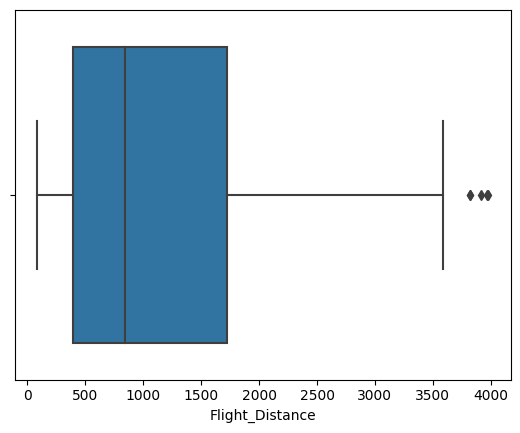

In [126]:
sns.boxplot(x=random_subset['Flight_Distance'])

<AxesSubplot: xlabel='Departure_Delay_in_Minutes'>

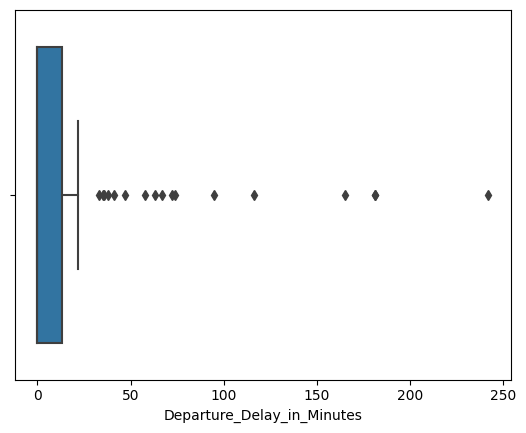

In [127]:
sns.boxplot(x=random_subset['Departure_Delay_in_Minutes'])

<AxesSubplot: xlabel='Arrival_Delay_in_Minutes'>

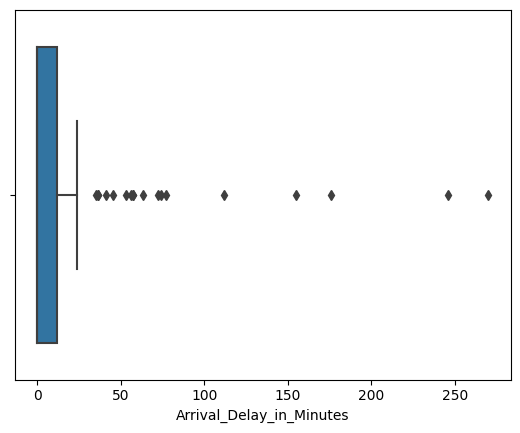

In [128]:
sns.boxplot(x=random_subset['Arrival_Delay_in_Minutes'])

In [129]:
# Maak eerst een opsplitsing in de data tussen tevreden en ontevreden passagiers
tevreden = random_subset.loc[random_subset['satisfaction'] == 1]
ontevreden = random_subset.loc[random_subset['satisfaction'] == 0]

In [130]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]

In [131]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,100.0,0.47,0.501614,0.0,0.0,0.0,1.00,1.0
Customer_Type,100.0,0.82,0.386123,0.0,1.0,1.0,1.00,1.0
Age,100.0,39.38,15.109553,7.0,27.0,39.5,52.00,68.0
Type_of_Travel,100.0,0.69,0.464823,0.0,0.0,1.0,1.00,1.0
Class,100.0,2.01,0.969171,1.0,1.0,2.0,3.00,3.0
Flight_Distance,100.0,1238.87,1071.611697,86.0,397.0,840.0,1721.75,3979.0
Inflight_wifi_service,100.0,2.83,1.206506,0.0,2.0,3.0,4.00,5.0
Departure/Arrival_time_convenient,100.0,3.00,1.497473,0.0,2.0,3.0,4.00,5.0
Ease_of_Online_booking,100.0,2.74,1.291933,0.0,2.0,3.0,4.00,5.0
Gate_location,100.0,2.94,1.277782,1.0,2.0,3.0,4.00,5.0


In [132]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,100.0,0.47,0.501614,0.0,0.0,0.0,1.00,1.0
Customer_Type,100.0,0.82,0.386123,0.0,1.0,1.0,1.00,1.0
Age,100.0,39.38,15.109553,7.0,27.0,39.5,52.00,68.0
Type_of_Travel,100.0,0.69,0.464823,0.0,0.0,1.0,1.00,1.0
Class,100.0,2.01,0.969171,1.0,1.0,2.0,3.00,3.0
Flight_Distance,100.0,1238.87,1071.611697,86.0,397.0,840.0,1721.75,3979.0
Inflight_wifi_service,100.0,2.83,1.206506,0.0,2.0,3.0,4.00,5.0
Departure/Arrival_time_convenient,100.0,3.00,1.497473,0.0,2.0,3.0,4.00,5.0
Ease_of_Online_booking,100.0,2.74,1.291933,0.0,2.0,3.0,4.00,5.0
Gate_location,100.0,2.94,1.277782,1.0,2.0,3.0,4.00,5.0


In [133]:
#Correlaties berekenen. Een gemakkelijke waarbij we alle relevante variabelen in een tabel krijgen
random_subset.corr()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Gender,1.000000,-0.028162,0.020178,0.154659,0.135678,-0.010972,-0.000167,0.013447,-0.074505,-0.176190,...,-0.095841,0.201442,-0.011568,-0.005496,0.014484,-0.067253,-0.079041,-0.052558,-0.073392,0.151951
Customer_Type,-0.028162,1.000000,0.342532,-0.314040,0.139820,0.262713,-0.088031,0.244573,-0.115013,-0.042584,...,0.056229,0.075956,0.110204,0.118388,0.133805,0.147854,0.011293,0.036379,0.027505,0.125955
Age,0.020178,0.342532,1.000000,-0.030519,0.065267,0.076722,-0.057371,0.159822,-0.113385,-0.063682,...,0.077081,0.090656,0.220436,0.014868,0.060159,0.113008,0.035732,0.040518,0.064278,0.175031
Type_of_Travel,0.154659,-0.314040,-0.030519,1.000000,0.522659,0.298441,0.157240,-0.232187,0.066272,-0.031632,...,0.010009,0.077059,0.178929,-0.160143,-0.029524,-0.173066,-0.044647,-0.005988,-0.049630,0.514794
Class,0.135678,0.139820,0.065267,0.522659,1.000000,0.473941,-0.059000,-0.006960,0.018232,-0.056607,...,-0.068806,0.079621,0.149679,-0.070933,0.055807,-0.050873,-0.096066,-0.047944,-0.099696,0.413046
Flight_Distance,-0.010972,0.262713,0.076722,0.298441,0.473941,1.000000,-0.002650,0.120749,-0.055102,-0.024305,...,-0.079704,-0.071667,0.160353,-0.101328,-0.135342,-0.125066,-0.218323,0.069808,0.042688,0.181943
Inflight_wifi_service,-0.000167,-0.088031,-0.057371,0.157240,-0.059000,-0.002650,1.000000,0.190088,0.593466,0.360233,...,0.271213,0.088267,0.290168,0.054621,-0.032786,0.243044,0.013453,-0.074917,-0.049577,0.219672
Departure/Arrival_time_convenient,0.013447,0.244573,0.159822,-0.232187,-0.006960,0.120749,0.190088,1.000000,0.281942,0.263948,...,-0.051781,0.069565,-0.092998,0.053451,0.140162,0.225279,-0.167165,0.066545,0.070980,-0.027292
Ease_of_Online_booking,-0.074505,-0.115013,-0.113385,0.066272,0.018232,-0.055102,0.593466,0.281942,1.000000,0.535030,...,0.057618,-0.020964,0.200616,-0.089627,0.017496,0.141942,-0.107631,-0.006030,0.013767,0.073707
Gate_location,-0.176190,-0.042584,-0.063682,-0.031632,-0.056607,-0.024305,0.360233,0.263948,0.535030,1.000000,...,0.033983,0.007651,0.093850,-0.053036,-0.165524,-0.066341,-0.112614,0.223062,0.223789,-0.168558


In [134]:
#Correlatie berekenen
stats.pearsonr(random_subset['Age'],random_subset['Departure_Delay_in_Minutes'])

PearsonRResult(statistic=0.04051797173999963, pvalue=0.6889723637215082)

In [135]:
#Tijd voor meer overzicht
import pingouin as pg

In [136]:
#Correlatie tussen alle variabelen in een tabel
random_subset.iloc[:, 0:25].rcorr()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Gender,-,,,,,,,,,,...,,*,,,,,,,,
Customer_Type,-0.028,-,***,**,,**,,*,,,...,,,,,,,,,,
Age,0.02,0.343,-,,,,,,,,...,,,*,,,,,,,
Type_of_Travel,0.155,-0.314,-0.031,-,***,**,,*,,,...,,,,,,,,,,***
Class,0.136,0.14,0.065,0.523,-,***,,,,,...,,,,,,,,,,***
Flight_Distance,-0.011,0.263,0.077,0.298,0.474,-,,,,,...,,,,,,,*,,,
Inflight_wifi_service,-0.0,-0.088,-0.057,0.157,-0.059,-0.003,-,,***,***,...,**,,**,,,*,,,,*
Departure/Arrival_time_convenient,0.013,0.245,0.16,-0.232,-0.007,0.121,0.19,-,**,**,...,,,,,,*,,,,
Ease_of_Online_booking,-0.075,-0.115,-0.113,0.066,0.018,-0.055,0.593,0.282,-,***,...,,,*,,,,,,,
Gate_location,-0.176,-0.043,-0.064,-0.032,-0.057,-0.024,0.36,0.264,0.535,-,...,,,,,,,,*,*,


In [137]:
#Beperking van aantal variabelen met nu ook de p waardes in de tabel
#Bepaal het significantie niveau (p waardes)
#Onder de diagonaal de r waardes; boven de diagonaal de p waardes
random_subset.iloc[:, [0,1,2,5,20,21]].rcorr(stars=False, decimals=3)

,Gender,Customer_Type,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Gender,-,0.781,0.842,0.914,0.604,0.468
Customer_Type,-0.028,-,0.000,0.008,0.719,0.786
Age,0.02,0.343,-,0.448,0.689,0.525
Flight_Distance,-0.011,0.263,0.077,-,0.490,0.673
Departure_Delay_in_Minutes,-0.053,0.036,0.041,0.07,-,0.000
Arrival_Delay_in_Minutes,-0.073,0.028,0.064,0.043,0.97,-


In [138]:
#Niet omdat het moet, maar omdat het kan 
random_subset.iloc[:, [0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].rcorr(stars=False, decimals=3)

,Gender,Customer_Type,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
Gender,-,0.781,0.999,0.894,0.461,0.08,0.611,0.089,0.854,0.343,0.044,0.909,0.957,0.886,0.506,0.434
Customer_Type,-0.028,-,0.384,0.014,0.255,0.674,0.694,0.158,0.506,0.578,0.453,0.275,0.241,0.184,0.142,0.911
Inflight_wifi_service,-0.0,-0.088,-,0.058,0.000,0.000,0.867,0.002,0.111,0.006,0.383,0.003,0.589,0.746,0.015,0.894
Departure/Arrival_time_convenient,0.013,0.245,0.19,-,0.004,0.008,0.259,0.869,0.914,0.609,0.492,0.357,0.597,0.164,0.024,0.096
Ease_of_Online_booking,-0.075,-0.115,0.593,0.282,-,0.000,0.481,0.109,0.310,0.569,0.836,0.045,0.375,0.863,0.159,0.286
Gate_location,-0.176,-0.043,0.36,0.264,0.535,-,0.055,0.028,0.885,0.737,0.94,0.353,0.600,0.1,0.512,0.265
Food_and_drink,-0.052,-0.04,0.017,-0.114,-0.071,-0.192,-,0.013,0.000,0.000,0.835,0.918,0.712,0.745,0.728,0.000
Online_boarding,0.171,0.142,0.313,-0.017,0.161,-0.219,0.248,-,0.000,0.001,0.06,0.011,0.528,0.000,0.164,0.000
Seat_comfort,-0.019,0.067,0.16,-0.011,0.103,-0.015,0.592,0.524,-,0.000,0.043,0.035,0.928,0.005,0.55,0.000
Inflight_entertainment,-0.096,0.056,0.271,-0.052,0.058,0.034,0.569,0.333,0.611,-,0.000,0.000,0.006,0.426,0.000,0.000


In [139]:
#Een alternatieve methode
#De r en p waardes
random_subset[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].rcorr(stars=False)

,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,-,0.448,0.689,0.525
Flight_Distance,0.077,-,0.490,0.673
Departure_Delay_in_Minutes,0.041,0.07,-,0.000
Arrival_Delay_in_Minutes,0.064,0.043,0.97,-


In [140]:
#Tijd voor lineaire regressie
#Met gebruik van Pingouin
#Voorspellen van Flight Distance op basis van leeftijd
lm = pg.linear_regression(random_subset['Age'], random_subset['Flight_Distance'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1024.59,301.10,3.40,0.00,0.01,-0.0,427.07,1622.11
1,Age,5.44,7.14,0.76,0.45,0.01,-0.0,-8.73,19.62


In [141]:
#Voorspellen van Arrival Delay op basis van Flight Distance
lm = pg.linear_regression(random_subset['Flight_Distance'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,16.8,7.07,2.38,0.02,0.0,-0.01,2.78,30.83
1,Flight_Distance,0.0,0.00,0.42,0.67,0.0,-0.01,-0.01,0.01


In [142]:
#We stoppen ook Departure Delay in het model
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.39,1.77,0.78,0.43,0.94,0.94,-2.13,4.91
1,Flight_Distance,-0.00,0.00,-1.02,0.31,0.94,0.94,-0.00,0.00
2,Departure_Delay_in_Minutes,1.06,0.03,39.27,0.00,0.94,0.94,1.00,1.11


In [143]:
#We voegen ook nog leeftijd toe (ouderen vertragen het boarden .....)
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes', 'Age']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.72,3.35,-0.51,0.61,0.94,0.94,-8.37,4.93
1,Flight_Distance,-0.00,0.00,-1.09,0.28,0.94,0.94,-0.00,0.00
2,Departure_Delay_in_Minutes,1.06,0.03,39.24,0.00,0.94,0.94,1.00,1.11
3,Age,0.08,0.08,1.09,0.28,0.94,0.94,-0.07,0.23


In [144]:
#Interessante uitkomst; we zien de r2 toenemen als we Departure Delay toevoegen. 
#We zien ook dat Flight Distance niet significant is
#Age toevoegen verandert niets aan ons model en is niet significant
#Dus we doen de regressie vergelijking nog een keer zonder FD en Age
lm = pg.linear_regression(random_subset['Departure_Delay_in_Minutes'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.09,1.23,0.07,0.94,0.94,0.94,-2.34,2.53
1,Departure_Delay_in_Minutes,1.06,0.03,39.29,0.00,0.94,0.94,1.00,1.11


In [145]:
#Een briljante constatering: je voorspelt vertraging bij aankomst heel goed met vertraging bij vertrek :-)
#Voor de liefhebbers: we kunnen het ook met numpy uitvoeren
X = random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes', 'Age']].to_numpy()
y = random_subset['Arrival_Delay_in_Minutes'].to_numpy()
pg.linear_regression(X, y).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.72,3.35,-0.51,0.61,0.94,0.94,-8.37,4.93
1,x1,-0.00,0.00,-1.09,0.28,0.94,0.94,-0.00,0.00
2,x2,1.06,0.03,39.24,0.00,0.94,0.94,1.00,1.11
3,x3,0.08,0.08,1.09,0.28,0.94,0.94,-0.07,0.23


In [146]:
#We weten nu wel de coefficienten, maar niet het belang van de variabelen
#Is wel te herleiden uit t scores en p waarden, maar toch
lm = pg.linear_regression(X, y, remove_na=True, relimp=True)
lm[['names', 'relimp', 'relimp_perc']]

,names,relimp,relimp_perc
0,Intercept,NaN,NaN
1,x1,0.001194,0.126801
2,x2,0.938106,99.623925
3,x3,0.002347,0.249274
